In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import ipywidgets as widgets

%matplotlib widget

In [2]:
t = np.linspace(1, 10, 100)

y = np.sin(t)

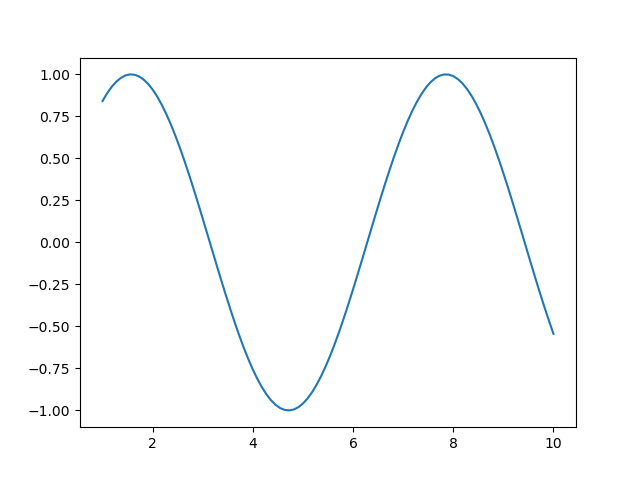

In [3]:
plt.plot(t,y)
plt.show()

In [4]:
def func(x, degree_num, degree_den, *coeffs):
    num = sum( [coeffs[i] * x**i for i in range(degree_num + 1)] )
    den = sum( [coeffs[i+(degree_num+1)] * x**i for i in range(degree_den+1)] )
    return num / den

In [5]:
from sympy import Symbol

x = Symbol("x")
degree_num = 1
degree_den = 3
coeffs = [1,2, 1,1,1,1]
func(x, degree_den, degree_num, *coeffs)

(x**3 + x**2 + 2*x + 1)/(x + 1)

IntSlider(value=0, max=10)

IntSlider(value=0, max=10)

Output()

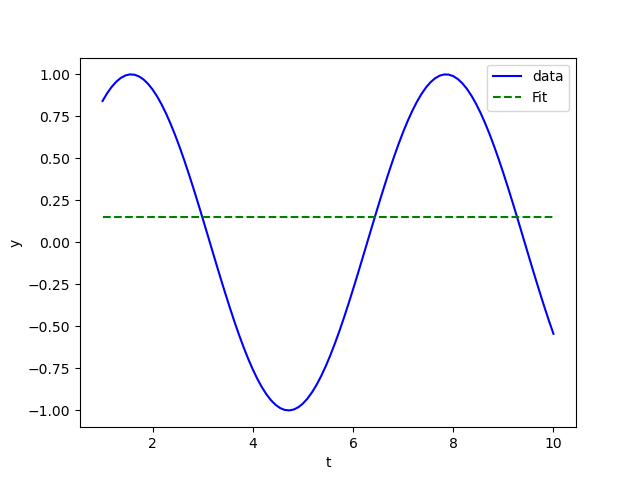

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://stackoverflow.com/questions/78178330/updating-multiple-plots-in-jupyter-notebook-when-a-slider-value-changes
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html#Example
# https://stackoverflow.com/questions/4098131/how-to-update-a-plot-in-matplotlib

degree_num = 0
degree_den = 0

# Create figure once
fig, ax = plt.subplots()
line_data, = ax.plot(t, y, 'b-', label='data')
line_fit, = ax.plot(t, y, 'g--', label='Fit')

ax.set_xlabel('t')
ax.set_ylabel('y')    
ax.legend()

output = widgets.Output()

int_range1 = widgets.IntSlider(min=0, max=10, description='Degree Numerator:')
int_range2 = widgets.IntSlider(min=0, max=10, description='Degree Denominator:')


def on_value_change(degree_num, degree_den):
    # degree_num = int_range1.value
    # degree_den = int_range2.value

    try:
        p0 = np.ones(degree_num+degree_den+2)
        popt, pcov = curve_fit(lambda x, *p0 : func(x, degree_num, degree_den, *p0), t, y, p0=p0)
    
        # clear_output(wait=True)pip install ipympl
    
        rounded_popt = [round(p) for p in popt]
        x = Symbol("x")
        display(func(x, degree_num, degree_den, *rounded_popt))
    
        
        # plt.figure()
        # plt.plot(t, y, 'b-', label='data')
        line_fit.set_ydata( func(t, degree_num, degree_den, *popt) ) 
        fig.canvas.draw_idle()
    
        # show_inline_matplotlib_plots()
    
    except:
        # clear_output(wait=True)
        print("Error no solution found")


a = widgets.IntSlider(value=0, min=0, max=10)
b = widgets.IntSlider(value=0, min=0, max=10)
    
out1 = widgets.interactive_output(on_value_change, {"degree_num": a, "degree_den":b} )

display(a, b, out1)